# Spanning Trees

Digamos que tenemos V vertices conectados con E ejes de alguna forma. Un minimum spanning tree (MST) es un subconjunto E' de los E ejes tal que los vertices V siguen conectados pero se tiene el minimo peso total de la grafica. <br> 
Remark: El conjunto E' siempre profa un arbol. (un grafo sin direccion, con n vertices y n-1 ejes, acicluco y conexo). Cualquier grafo conectado y sin direccion con |E| = |V| -1 es un arbol.  <br> 

#### Greedy algoritmos para encontrar MST
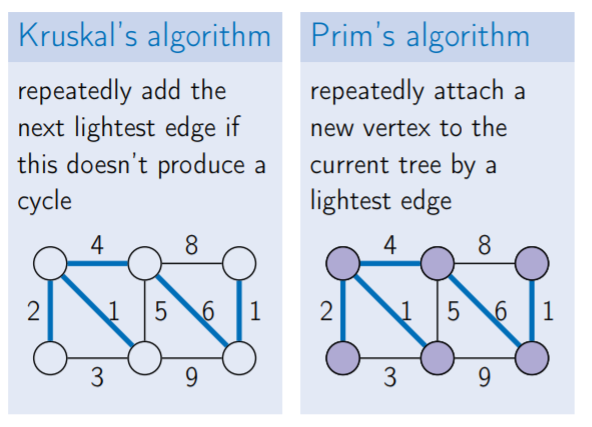
Aqui se ve como en el kruscal se empiezan a ir agregando los ejes mas baratos sin crear ciclos. El Prim empieza con un nodo y va agregando el nodo aledano mas barato que no cree un ciclo y asi sigue expandiendose. 

##### Propiedad de Corte
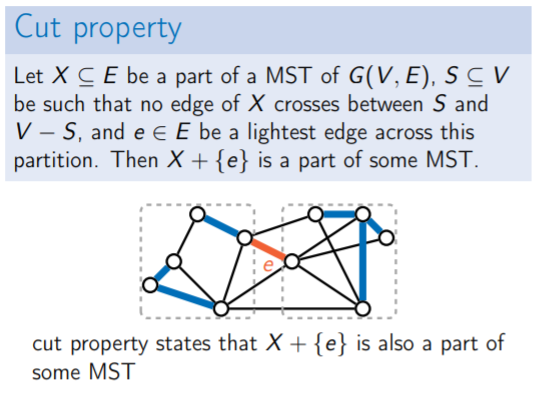


### Algoritmo de Kruskal:
Ir agragando el eje mas barato que no cree un ciclo, hasta que todos los vertices esten conectados.
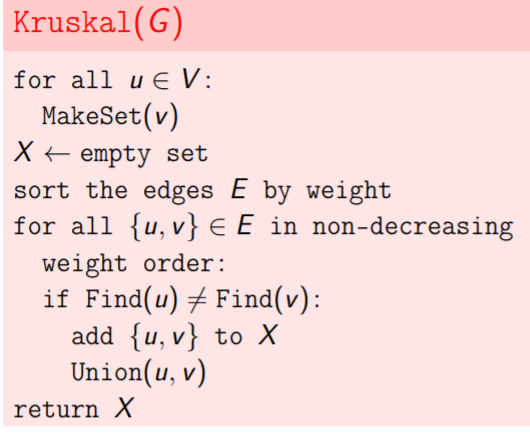

## Algoritmo de Prim
Empezamos desde un vertice y vamos uniendo el vertice conectado que sea mas barato sin crear ciclos. 
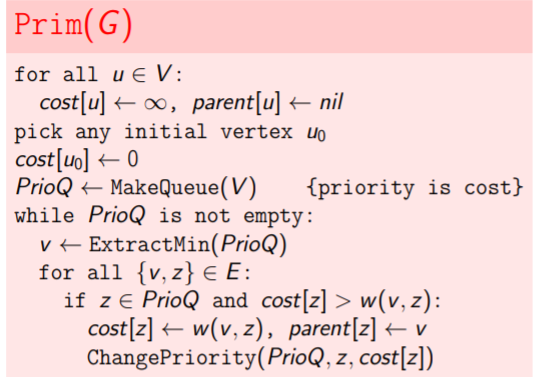

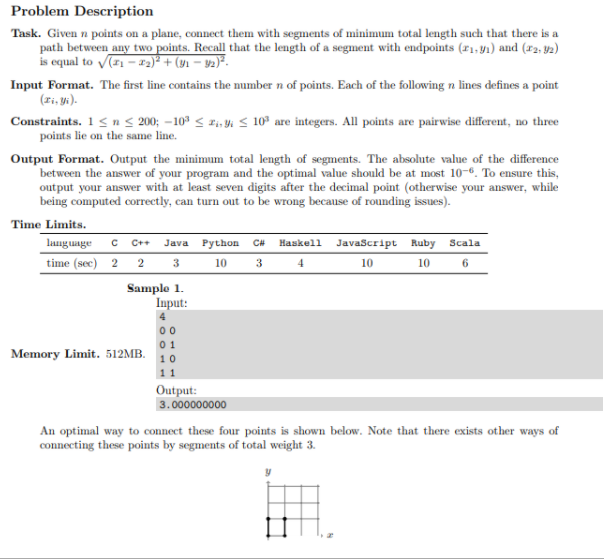

In [15]:
''' Building Roads to connect Cities'''
'''Usar'e el algoritmo de Kruskal porque el de prim requiere de minHeaps
y este requiere de disjoint sets. '''
''' Dados n puntos, encuentra los ejes para conectarlos todos (sin ciclos)
de forma que la distancia total sea minima. Outputear dicha distancia.'''

#Para esto necesitamos el data structure de disjoint sets
from math import *

#Punto es la clase de puntos (duh)
class punto:
    #Cx, cy son la coordenada x y y.
    #Los vamos a ordenar en conjuntos disjuntos, recordar que cada conjunto
    #es un arbol en el que el 'nombre' del conjunto es el elemento root.
    #Al principio, cada elemento es disjunto por lo que cada uno es su propio
    #parent. Rank es la altura de cada arbol (conjunto) que inicialmente es 0
    def __init__(self, ind, cx, cy):
        self.ind = ind
        self.cx = cx
        self.cy = cy
        self.parent = self
        self.rank = 0
    
    #Find busca el conjunto al que pertence self. Por esto, mientras no sea su
    #propio padre, va buscando padres y subiendo el arbol. Asi hasta que llega
    #Al punto mas alto del arbol (que es el 'nombre' del conjunto) y lo returna
    def find(self):
        if self != self.parent:
            self.parent = punto.find(self.parent)
        return(self.parent)
    
    #Union junta dos conjuntos. Primero encuentra el nombre de cada conjunto.
    #(El punto root de self y de other). Si tienen el mismo nombre, no pasa nada
    #Si tienen distintos nombre, checa el rank (altura) de cada uno y si
    #El iff tiene mayor rank, entonces le pega el jff abajo (hace que iff sea su padre)
    #Sino (el rango de jff es mayor al de iff) entonces pega iff debajo de jff
    # Luego actualiza el rango de jff. *checar notas
    def union(self,other):
        iff = punto.find(self)
        jff = punto.find(other)
        if iff == jff:
            return
        if iff.rank > jff.rank:
            jff.parent = iff
        else:
            iff.parent = jff
            if iff.rank == jff.rank:
                jff.rank = jff.rank +1
        

#Eje es la clase que guarda las distancias
class eje:
    #Guarda los puntos (objetos) de cada eje y guarda su distancia. 
    def __init__(self, pto1, pto2):
        self.pto1 = pto1
        self.pto2 = pto2
        self.peso = eje.distancia(pto1,pto2)

    #La funcion lower than se define con respecto al peso
    def __lt__(self, other):
        return(self.peso < other.peso)

    #La distancia es la euclidea de siempre
    def distancia(a,b):
        d = sqrt((a.cx-b.cx)**2 + (a.cy-b.cy)**2)
        return(d)

#result va a tener las conexiones resultantes
result = []

#Algoritmo
def kruskal(puntos,distancias):

    #Primero ordena los ejes de menor a mayor distancia
    distancias.sort()
    dis = len(distancias)
    suma = 0
    
    #Va uno a uno de menor a mayor distancias.
    for d in distancias:
        #Si los roots de este eje son distintos (no estan conetados), los une.
        if punto.find(d.pto1) != punto.find(d.pto2):
            result.append([(d.pto1.cx,d.pto1.cy),(d.pto2.cx,d.pto2.cy), d.peso])
            suma = suma + d.peso
            punto.union(d.pto1, d.pto2)
    return(suma)


n = int(input())
puntos = []
distancias = []

#agarramos toddos los puntos
for i in range(n):
    x , y = [int(x) for x in input().split()]
    puntos.append(punto(i,x,y))

#distancias son los ejes. Formamos todos los ejes posibles. 
for j in range(n):
    for k in range(j):
        if j != k:
            distancias.append(eje(puntos[j],puntos[k]))


            
def imprime(result):
    for i in result:
        print("ejes que conecta:", i[0],i[1], "Costo:", i[2])
            
            
            
costtot = kruskal(puntos,distancias)
imprime(result)

print("Costo Total", costtot)

5
0 0
0 2
1 1
3 0
3 2
ejes que conecta: (1, 1) (0, 0) Costo: 1.4142135623730951
ejes que conecta: (1, 1) (0, 2) Costo: 1.4142135623730951
ejes que conecta: (3, 2) (3, 0) Costo: 2.0
ejes que conecta: (3, 0) (1, 1) Costo: 2.23606797749979
Costo Total 7.06449510224598


# Clustering
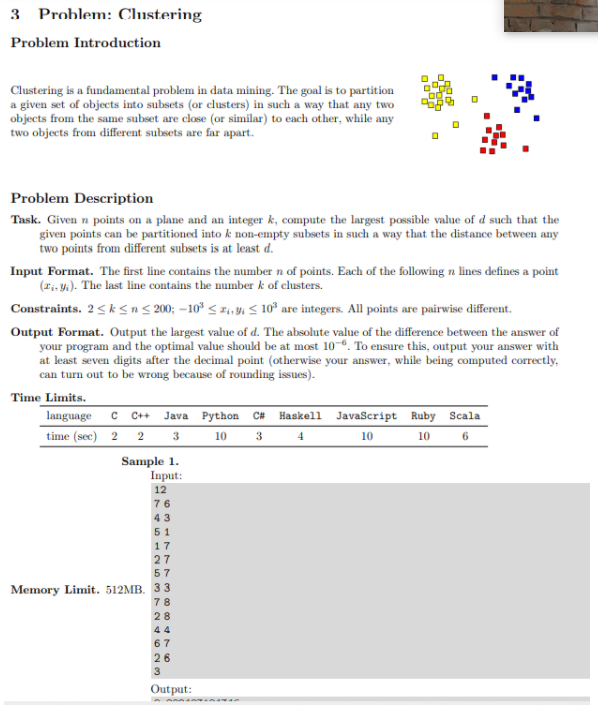

In [2]:
''' Clustering '''
'''Dados n puntos y un numero k, partir los n puntos en k grupos no vacios,
y dar el maximo numero d de tal forma que la distancia entre elementos de dos grupos
distintos sea al menos d (alejar bien los grupos)'''

#Para esto necesitamos el data structure de disjoint sets
from math import *

#Punto es la clase de puntos (duh)
class punto:
    #Cx, cy son la coordenada x y y.
    #Los vamos a ordenar en conjuntos disjuntos, recordar que cada conjunto
    #es un arbol en el que el 'nombre' del conjunto es el elemento root.
    #Al principio, cada elemento es disjunto por lo que cada uno es su propio
    #parent. Rank es la altura de cada arbol (conjunto) que inicialmente es 0
    def __init__(self, ind, cx, cy):
        self.ind = ind
        self.cx = cx
        self.cy = cy
        self.parent = self
        self.rank = 0
    
    #Find busca el conjunto al que pertence self. Por esto, mientras no sea su
    #propio padre, va buscando padres y subiendo el arbol. Asi hasta que llega
    #Al punto mas alto del arbol (que es el 'nombre' del conjunto) y lo returna
    def find(self):
        if self != self.parent:
            self.parent = punto.find(self.parent)
        return(self.parent)
    
    #Union junta dos conjuntos. Primero encuentra el nombre de cada conjunto.
    #(El punto root de self y de other). Si tienen el mismo nombre, no pasa nada
    #Si tienen distintos nombre, checa el rank (altura) de cada uno y si
    #El iff tiene mayor rank, entonces le pega el jff abajo (hace que iff sea su padre)
    #Sino (el rango de jff es mayor al de iff) entonces pega iff debajo de jff
    # Luego actualiza el rango de jff. *checar notas
    def union(self,other):
        iff = punto.find(self)
        jff = punto.find(other)
        if iff == jff:
            return
        if iff.rank > jff.rank:
            jff.parent = iff
        else:
            iff.parent = jff
            if iff.rank == jff.rank:
                jff.rank = jff.rank +1
        

#el peso del eje es la distancia entre los puntos
class eje:
    def __init__(self, pto1, pto2):
        self.pto1 = pto1
        self.pto2 = pto2
        self.peso = eje.distancia(pto1,pto2)

    def __lt__(self, other):
        return(self.peso < other.peso)

    def distancia(a,b):
        d = sqrt((a.cx-b.cx)**2 + (a.cy-b.cy)**2)
        return(d)



def kruskal(puntos,distancias, k):
    #Ordenamos las distancias de menot a mayor (que son los ejes)
    distancias.sort()
    #Numsgrup es el numero de grupos que tenemos hasta ahora
    numsgrup = len(puntos)
    suma = 0
    i=0
    
    
    for d in distancias:
        #mientras el numero de grupos sea mayor a k (el numero de grupos que queremos)
        if numsgrup >= k:
            if punto.find(d.pto1) != punto.find(d.pto2):
                #X.append(d)

                suma = suma + d.peso
                #Si se realizo una union, el numero de grupos baja en 1
                punto.union(d.pto1, d.pto2)
                numsgrup = numsgrup - 1
        else:
            break
        
        i = i+1
     
    return(distancias[i-1].peso)


n = int(input())
puntos = []
distancias = []

for i in range(n):
    x , y = [int(x) for x in input().split()]
    puntos.append(punto(i,x,y))

k =int(input())
for j in range(n):
    for g in range(j):
        if j != g:
            distancias.append(eje(puntos[j],puntos[g]))

#print([p for p in puntos])
#print([(d.pto1 ,d.pto2) for d in distancias])
print(kruskal(puntos,distancias, k))



dsf


ValueError: invalid literal for int() with base 10: 'dsf'

# Algoritmo de Kruskal Alternativo

In [4]:
# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph
 
from collections import defaultdict
 
# Class to represent a graph

class Graph:
    
    #Definimos la clase grafo
    def __init__(self, vertices):
        #el grafo tiene el numero de vertices y de diccionario para guardar el grafo
        self.V = vertices  # No. of vertices
        self.graph = []  # default dictionary
        # to store graph
        
    #Un eje es una triada con salida, llegada y peso
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 

    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):
 
        result = []  # This will store the resultant MST
         
        # An index variable, used for sorted edges
        i = 0
         
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in 
        # non-decreasing order of their
        # weight.  If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph, 
                            key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge does't
            #  cause cycle, include it in result 
            #  and increment the indexof result 
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge
 
        minimumCost = 0
        print ("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
            print("%d -- %d == %d" % (u, v, weight))
        print("Minimum Spanning Tree" , minimumCost)

# Driver code
g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4)
 
# Function call
g.KruskalMST()
 

Edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Minimum Spanning Tree 19
